In [24]:
import matplotlib.pyplot as plt

def plot_tree(base, context):
    """
    Plot a tree using matplotlib.
    """
    fig, ax = plt.subplots()
    ax.axis('off')

    # Node positions
    positions = {
        "Bedtime": (0, 0),  # ROOT
        "Late": (-2, -0.5),  # CHOICE
        "Early": (3.5, -0.5),  # CHOICE
        "Health": (-4, -1.5),  # VALUE
        "Wealth": (-2, -1.5),  # VALUE
        "Career": (0, -1.5),  # VALUE
        "Health\n(SD)": (2, -1.5),  # VALUE
        "Wealth\n(SD)": (3.5, -1.5),  # VALUE
        "Career\n(SD)": (5, -1.5),  # VALUE
        "Sleep\nTime": (0, -2.5)  # CONTEXT
    }

    # Draw edges
    edges = [
        ("Bedtime", "Late", None),
        ("Bedtime", "Early", None),
        ("Late", "Health", base[0]),
        ("Late", "Wealth", base[1]),
        ("Late", "Career", base[2]),
        ("Early", "Health\n(SD)", -base[0]),
        ("Early", "Wealth\n(SD)", -base[1]),
        ("Early", "Career\n(SD)", -base[2]),
        ("Sleep\nTime", "Health", context[0]),
        ("Sleep\nTime", "Wealth", context[1]),
        ("Sleep\nTime", "Career", context[2]),
        ("Sleep\nTime", "Health\n(SD)", -context[0]),
        ("Sleep\nTime", "Wealth\n(SD)", -context[1]),
        ("Sleep\nTime", "Career\n(SD)", -context[2])
    ]

    for edge in edges:
        start_pos = positions[edge[0]]
        end_pos = positions[edge[1]]
        weight = edge[2]

        if weight is not None:
            x_offset = 0.05 * (end_pos[0] - start_pos[0]) + 0.3
            y_offset = 0.05 * (end_pos[1] - start_pos[1])
            ax.text(
                (start_pos[0] + end_pos[0]) / 2 + x_offset,
                (start_pos[1] + end_pos[1]) / 2 + y_offset,
                weight,
                ha='center',
                va='center'
            )

        ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-', linewidth=2)

    # Draw nodes
    node_size = 0.2

    for label, pos in positions.items():
        ax.text(pos[0], pos[1], label, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'), fontsize=10)

    plt.show()


In [25]:
def convert_likert_to_range(likert_value):
    # Mapping of Likert scale values to the corresponding range
    scale_mapping = {
        1: -10,
        2: -5,
        3: 0,
        4: 5,
        5: 10
    }

    return scale_mapping[likert_value]


In [26]:
def calculate_differences(base, context):
    # Check if the lengths of the arrays are the same

    differences = []
    for i in range(len(base)):
        diff = convert_likert_to_range(context[i]) - convert_likert_to_range(base[i])
        differences.append(diff)

    return differences


calculate_differences([5, 4, 3], [5, 2, 2])

[0, -10, -5]

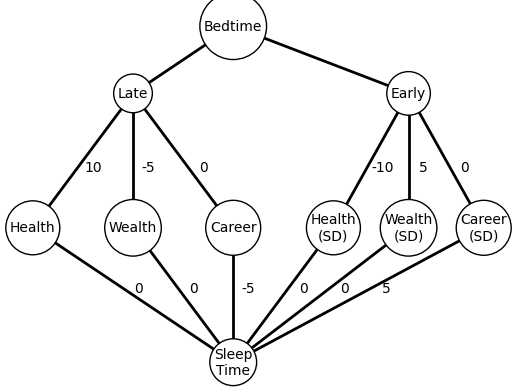

In [27]:
base = [5, 2, 3]
context = [5, 2, 2]

plot_tree([convert_likert_to_range(val) for val in base], calculate_differences(base, context))